#**Práctica	2 (Sensores atmosféricos)**

**Se cuenta con los datos del año 2020 de distintas mediciones de un sensor medioambiental situado en el
campus de la Universidad Francisco de Vitoria. Para analizar la información recogida haremos uso de un
dataset proporcionado por la propia Universidad llamado “ozone”.**


---


**1.- Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso.**

Utilizamos el diagrama de caja (boxplot) porque es una herramienta sencilla para visualizar la distribución de los datos y detectar valores atípicos en una sola variable unidimensionalmente.
De momento solo representamos los diagramas, sin calcular los cuartiles pues no los vamos a utilizar de momento hasta el siguiente apartado.

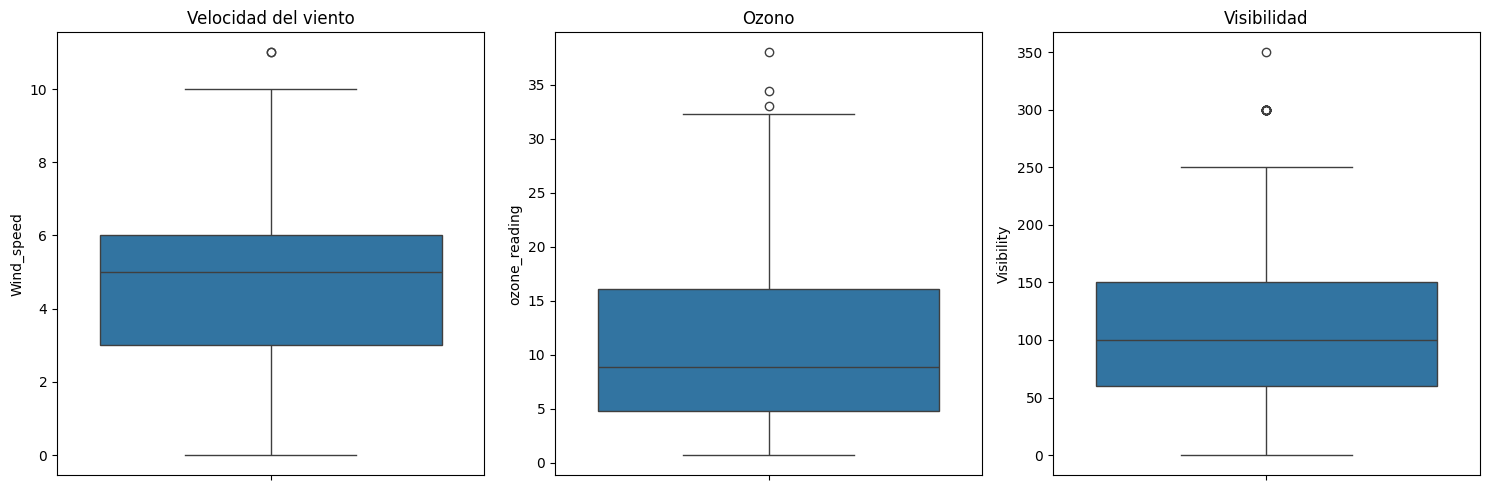

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar el archivo CSV
df = pd.read_csv('ozone.csv')

# Crear subgráficos para cada variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de variables a analizar
variables = ['Wind_speed', 'ozone_reading', 'Visibility']
titulos = ['Velocidad del viento', 'Ozono', 'Visibilidad']

for i, var in enumerate(variables):
    # Ordenar la distribución
    sorted_data = df[var].sort_values()

    # Diagrama de caja para la variable actual
    sns.boxplot(y=df[var], ax=axes[i])

    # Configuración del título
    axes[i].set_title(titulos[i])

plt.tight_layout()
plt.show()

Una vez hemos representado los datos en las diferentes gráficas, podemos analizarlos.

Para la velocidad del viento podemos observar que tenemos como el valor mayor un outlier, entorno al 11 kilómetros por hora (asumimos estas unidades pues se adaptan al sistema que utilizamos en España, donde se encuentra el lugar de estudio). Verificándolo en la base de datos, comprobamos que hay 2 valores que se encuentran en el 11 km/h, representando cambios bruscos de clima. Por otro lado, el valor más bajo es 0 pero al no estar representado con un punto solo, quiere decir que existen más valores para el 0 km/h, en concreto 9 según nuestra base de datos. Por último, la mayor parte de días tienen una velocidad de viento de entre 6 y 3 km/h pero se concetra más (la mediana) en 5 km/h, lo que indica que es una velocidad del viento moderada. El bigote de arriba es más
largo que el de abajo, por ello hay más días en los que la velocidad del viento es mayor.

Para los valores obtenidos de ozono, seguimos el mismo procedimiento, el valor más alto son 37 m^3 que suele ser a finales de primavera y verano, cuando las condiciones del clima son propicias para formar ozono, es decir, en días muy soleados, con ausencia de viento y con altas temperaturas, justo ocurre el 30 de agosto según la base de datos. Encontramos un solo día en el que el más bajo son 0 m^3. La mayor parte de días tienen un valor del ozono de entre 5 y 15 m^3 aproximadamente, siendo el 9 m^3 el más frecuente (la mediana) en 2020. El bigote de arriba es más
corto que el de abajo, por ello hay más días en los que los valores de ozono son menores.

Por último, para la visibilidad, podemos observar que hay varios días con una visibilidad de 0 metros, la mayor parte de días hay una visibilidad de unos 50 a 150 metros, siendo la mayor concentración de días en la visibilidad de 100 metros, y para finalizar hay un día en concreto en el que existe una visibilidad de 350 metros, que si lo contrastamos en la base de datos, coincide con el día con mayor velocidad de viento, lo cual tiene sentido pues a mayor viento, menos acumulación de niebla y/o nubes.

**2.- Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”.**

In [ ]:
# Identificar outliers en Wind_speed y Visibility según los cuartiles
q1_ws = df['Wind_speed'].quantile(0.25)
q3_ws = df['Wind_speed'].quantile(0.75)
iqr_ws = q3_ws - q1_ws
lower_ws = q1_ws - 1.5 * iqr_ws
upper_ws = q3_ws + 1.5 * iqr_ws
outliers_ws = (df['Wind_speed'] < lower_ws) | (df['Wind_speed'] > upper_ws)

q1_v = df['Visibility'].quantile(0.25)
q3_v = df['Visibility'].quantile(0.75)
iqr_visibility = q3_v - q1_v
lower_v = q1_v - 1.5 * iqr_visibility
upper_v = q3_v + 1.5 * iqr_visibility
outliers_v = (df['Visibility'] < lower_v) | (df['Visibility'] > upper_v)

# Calcular intersección y unión de outliers
intersection = outliers_ws & outliers_v
union = outliers_ws | outliers_v

# Mostrar resultados
print("Intersección de outliers:")
print(df[intersection])

print("\nUnión de outliers:")
print(df[union])

Intersección de outliers:
    Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
22      2             9            1           2.92             5490   

    Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
22          11        72                    37                38.48   

    Inversion_base_height  Pressure_gradient  Inversion_temperature  \
22                   5000                 32                  38.12   

    Visibility  
22         350  

Unión de outliers:
     Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
22       2             9            1           2.92             5490   
23       2            10            2           4.08             5560   
24       2            12            4           8.32             5680   
28       2            20            5           5.73             5690   
29       2            23            1           4.04             5690   
30       2            24            2           6.0

El hecho de que exista una intersección de outliers (valores atípicos) significa que hay ciertos puntos de datos que son considerados outliers tanto en una variable como en otra. Esto indica una relación potencial entre esas dos variables o una influencia mutua en la presencia de valores atípicos. En este caso, una intersección de outliers entre la velocidad del viento y la visibilidad, podría sugerir que ciertas condiciones meteorológicas extremas están asociadas con valores atípicos en ambas variables al mismo tiempo, tal y como hemos analizado en el apartado anterior.

Por otro lado, en el caso de la unión de outliers entre las variables "Wind_speed" y "Visibility", se observa una serie de registros outliers en al menos una de las dos variables. Esto significa que, a diferencia de en la intersección, estos registros cumplen con los criterios para ser valores atípicos en al menos una de las dos variables, pero no necesariamente en ambas simultáneamente. En este caso,
sugiere la presencia de condiciones inusuales o extremas en esos días específicos. Por ejemplo, el registro en el índice 22 es un outlier en ambas variables (velocidad del viento y visibilidad), lo que indica un día con condiciones climáticas inusuales tanto en términos de velocidad del viento como de visibilidad, por eso, se encuentra en la intersección. Como acabamos de mencionar, algunos registros son outliers solo en una de las dos variables. Por ejemplo, el registro en el índice 36 es un outlier solo en la variable "Wind_speed", mientras que el registro en el índice 187 es un outlier solo en la variable "Visibility". Esto sugiere que estos días pueden tener condiciones climáticas extremas en términos de una variable específica, pero no necesariamente en la otra. La mayoría de los registros tienen valores atípicos en la visibilidad, lo que podría indicar días con condiciones de visibilidad inusualmente bajas.

**3.- Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?**


Categorizamos los meses según las estaciones del año pues es cuando ocurren los cambios de temperatura. Por otro lado, hemos elegido la comparación del ozono según los días de la semana, pues puede resultar interesante el estudio de sustancias en el aire en función del tráfico en la univerdad.

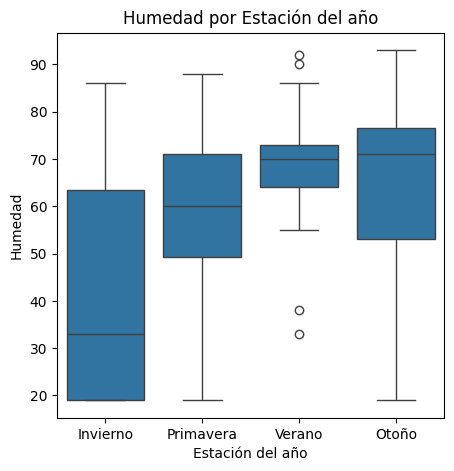

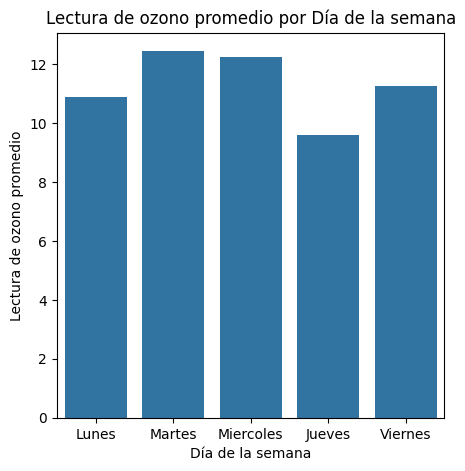

In [ ]:
# Categorizar Mes en estaciones del año
def cat_month(month):
    if month in [12, 1, 2]:
        return "Invierno"
    elif month in [3, 4, 5]:
        return "Primavera"
    elif month in [6, 7, 8]:
        return "Verano"
    elif month in [9, 10, 11]:
        return "Otoño"

df['Season'] = df['Month'].apply(cat_month)

# Categorizar Día de la semana en su nombre
def cat_day_of_week(day_of_week):
    if day_of_week == 1:
        return "Lunes"
    elif day_of_week == 2:
        return "Martes"
    elif day_of_week == 3:
        return "Miercoles"
    elif day_of_week == 4:
        return "Jueves"
    elif day_of_week == 5:
        return "Viernes"

df['Weekday'] = df['Day_of_week'].apply(cat_day_of_week)

# Diagrama de caja de Humedad por Estación del año
plt.figure(figsize=(5, 5))
sns.boxplot(x='Season', y='Humidity', data=df)
plt.title('Humedad por Estación del año')
plt.xlabel('Estación del año')
plt.ylabel('Humedad')
plt.show()

# Gráfico de barras de Lectura de ozono promedio por Día de la semana
plt.figure(figsize=(5, 5))
sns.barplot(x='Weekday', y='ozone_reading', data=df, errorbar=None)
plt.title('Lectura de ozono promedio por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Lectura de ozono promedio')
plt.show()

La elección de los tipos de gráficos utilizados para este ejercicio se basa en la naturaleza de las diferentes variables.

En cuanto al estudio de la relación de la Humedad con la Estación del año, hemos elegido un diagrama de caja, el cual es útil para visualizar la distribución de una variable cuantitativa en diferentes grupos o categorías y para comparar la distribución de una variable entre diferentes niveles de otra variable categórica. En este caso, nos permite comparar la distribución de la humedad en diferentes estaciones del año y detectar posibles diferencias o patrones estacionales. Observando el gráfico, observamos que primavera y otoño son estaciones en las que la humedad es muy similar, en invierno, se mueve un poco por todo el rango, podemos suponer que es por las precipitaciones, en cambio en verano, hay un índice alto de humedad con varios outliers hacia ambos lados, dependiendo de si hay algún día de lluvia o un día en el que hay un cambio brusco de la temperatura.

Por otro lado, para el estudio del Ozono en función del día de la semana, se ha elegido un gráfico de barras, ya que es útil para comparar valores promedio o totales de una variable entre diferentes categorías.En este caso, nos permite visualizar cómo varía la lectura promedio de ozono en función del día de la semana, lo que puede revelar patrones de comportamiento o influencias externas en la calidad del aire. Observando el gráfico, podemos ver a simple vista que la media en cada día en cuanto a niveles de O3 es muy similar a lo largo de toda la semana, esto lo podemos relacionar a que como estamos comparando la media anual (de todo 2020), los días calurosos con poca precipitación y poco viento, se compensan con su contrario y por ello obtenemos este gráfico tan similar para todos los días de la semana.

Sin embargo, podemos observar que a pesar de ser mínimas las diferencias, hay días en los que la concentración de ozono es mayor que otros. Los jueves son los días con menor concentración de ozono, por lo que es muy probable que los jueves fueran el día con mayor precipitaciones. Por otro lado, quitando los jueves, el lunes es el día con menor concentración de ozono ya que es cuando empieza la semana y por tanto hay menos concentración de O3 del fin de semana. A lo largo de la semana hay más tráfico y el ambiente se va llenando de esta sustancia. Por eso, también explicaríamos por qué los viernes y los lunes se parecen tanto, pues los viernes se "restablecen" de los jueves.

**4.- Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.**

Creemos que estudiar por el número del día no tendría sentido, por eso lo estudiaremos según las estaciones del año ya que es cuando se producen los cambios notables en el clima.

Las variables principales las vamos a considerar nosotros mismos según lo que consideramos interesante para el estudio. Las variables seleccionadas son 'ozone_reading', 'Wind_speed', 'Humidity', 'Visibility' y 'Temperature_ElMonte', son elegidas considerando su relevancia dentro del contexto de un sensor medioambiental situado en un campus universitario. El ozono es un contaminante común en el aire y su lectura es crucial para evaluar la calidad del aire en un entorno medioambiental. La velocidad del viento puede influir en la dispersión de contaminantes y en la ventilación del área, lo que es fundamental para comprender el movimiento y la distribución de sustancias en el aire.
La humedad puede afectar la formación de niebla y la evaporación de sustancias y la percepción del confort ambiental, lo que es esencial para comprender las condiciones medioambientales. La visibilidad está estrechamente relacionada con la presencia de partículas en el aire y puede proporcionar información sobre la presencia de contaminantes o la claridad del aire en un entorno determinado. Por último, la elección de la temperatura en El Monte es debido a que ya que no tenemos datos de la temperatura en la propia universidad, cogeremos los datos de un lugar situado lo más próximo posible ya que de la temperatura podemos determinar si la representación que estamos realizando es correcta o no.

En un principio, representamos las variables sin realizar ningún cambio en ellas, sin embargo, no observábamos diferencias notables. Por ello, normalizamos las variables ya que por un lado, nos permite comparar directamente la importancia relativa de diferentes variables. Al normalizar, estamos eliminando las diferencias en la escala de las variables, lo que facilita la comparación de su impacto en un mismo gráfico o análisis. También nos ayuda a eliminar las diferencias en la escala de las variables ya que pueden introducir sesgos significativos. Al normalizar, evitamos que una variable con una escala más grande domine el análisis o el modelo.

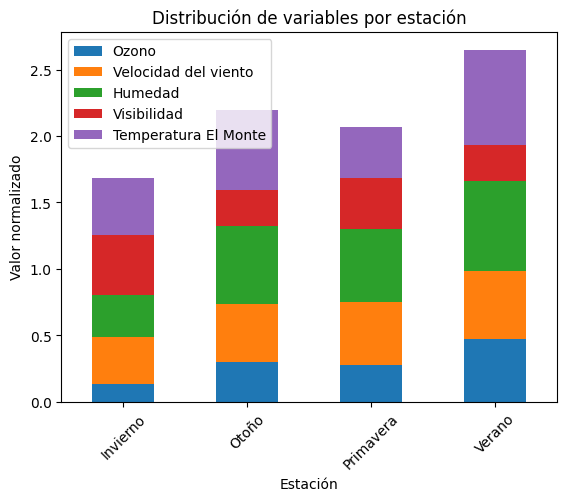

In [ ]:
# Seleccionar variables relevantes
variables_prin = ['ozone_reading', 'Wind_speed', 'Humidity', 'Visibility', 'Temperature_ElMonte']

# Calcular la media de cada variable por estación
normalized_df = (df[variables_prin] - df[variables_prin].min()) / (df[variables_prin].max() - df[variables_prin].min())
grouped_data = normalized_df.groupby(df['Season']).mean()

# Graficar
grouped_data.plot(kind='bar', stacked=True)
plt.legend(["Ozono", "Velocidad del viento", "Humedad", "Visibilidad", "Temperatura El Monte"])
plt.title('Distribución de variables por estación')
plt.xlabel('Estación')
plt.ylabel('Valor normalizado')
plt.xticks(rotation=45)
plt.show()


Basándonos en los resultados obtenidos del análisis de las variables en diferentes estaciones del año, podemos extraer las siguientes conclusiones del gráfico:

1. **Niveles de Ozono**:

Los niveles de ozono son más altos en verano, lo cual puede ser debido a varios factores, como la intensidad de la radiación solar y la actividad de alrededor, que pueden aumentar la producción de ozono en la atmósfera durante los meses más cálidos. La disminución gradual de estos niveles de ozono desde el verano hasta el invierno sugiere una menor radiación solar en los meses más fríos.

2. **Velocidad del Viento**:

La velocidad del viento muestra una tendencia a ser más baja en invierno en comparación con las otras estaciones. Esto puede estar relacionado con la estabilidad atmosférica y la presencia de sistemas de alta presión que pueden reducir la velocidad del viento durante los meses más fríos.
Las diferencias relativamente menores en la velocidad del viento entre verano, otoño y primavera podrían indicar una mayor variabilidad atmosférica en estos meses en comparación con el invierno.

3. **Humedad**:

La humedad tiende a ser más alta en verano, lo cual es consistente con la capacidad del aire caliente para retener más humedad. La presencia de mayor humedad en verano también puede estar relacionada con la evaporación de agua. La disminución gradual de la humedad desde el verano hasta el invierno puede ser atribuible a la menor temperatura y la menor capacidad del aire frío para retener la humedad.

4. **Visibilidad**:

La visibilidad tiende a ser más alta en invierno, lo cual podría ser resultado de condiciones atmosféricas más estables y menor presencia de niebla. La menor visibilidad en primavera, otoño y verano podría estar asociada con una mayor incidencia de condiciones atmosféricas variables, como la presencia de niebla o contaminación, que reducen la claridad del aire.

5. **Temperatura**:

De esta variable cabe resaltar que la tratamos en Fahrenheit pues si miramos la base de datos, observamos valores muy altos. Sin enmargo, al haberlo normalizado, las unidades no son algo a resaltar.
La temperatura es más alta en verano, lo cual es consistente con las estaciones más cálidas del año en la zona en la que nos situamos. Este aumento de temperatura puede ser resultado de una mayor radiación solar y temperaturas del aire más altas durante estos meses. La disminución gradual de la temperatura desde el verano hasta la primavera, el otoño y el invierno refleja las fluctuaciones estacionales normales en la temperatura ambiente.

En resumen, estos resultados sugieren una variabilidad estacional significativa en las condiciones atmosféricas, con impactos observables en las variables analizadas. Las diferencias estacionales en los niveles de ozono, velocidad del viento, humedad, visibilidad y temperatura pueden estar influenciadas por una combinación de factores climáticos y ambientales, así como por actividades humanas y cambios en los patrones meteorológicos estacionales.